In [1]:
#Import libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(rc={'figure.figsize':(20,10)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Import the data
df = pd.read_csv('week2.csv',index_col = 0)
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Month,Year,VWAP,Day_Perc_Change,Trend
0,ITC,EQ,2017-05-15,274.95,275.90,278.90,275.50,278.50,277.95,277.78,5462855,1.517477e+09,52501,4128324,75.57,5,2017,277.950000,0.000000,Slight or No change
1,ITC,EQ,2017-05-16,277.95,278.50,284.30,278.00,283.00,283.45,280.93,11204308,3.147583e+09,98347,8307567,74.15,5,2017,281.647312,0.019788,Slight or No change
2,ITC,EQ,2017-05-17,283.45,284.10,284.40,279.25,281.50,281.65,281.56,8297700,2.336261e+09,99107,5924804,71.40,5,2017,281.648205,-0.006350,Slight or No change
3,ITC,EQ,2017-05-18,281.65,278.00,281.05,277.05,277.65,277.90,278.49,7924261,2.206822e+09,47830,5434449,68.58,5,2017,280.745118,-0.013314,Slight or No change
4,ITC,EQ,2017-05-19,277.90,282.25,295.65,281.95,286.40,286.20,290.08,35724128,1.036268e+10,248579,19137631,53.57,5,2017,283.585253,0.029867,Slight or No change


In [3]:
#Info of tha data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 495
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  494 non-null    object 
 1   Series                  494 non-null    object 
 2   Date                    494 non-null    object 
 3   Prev Close              494 non-null    float64
 4   Open Price              494 non-null    float64
 5   High Price              494 non-null    float64
 6   Low Price               494 non-null    float64
 7   Last Price              494 non-null    float64
 8   Close Price             494 non-null    float64
 9   Average Price           494 non-null    float64
 10  Total Traded Quantity   494 non-null    int64  
 11  Turnover                494 non-null    float64
 12  No. of Trades           494 non-null    int64  
 13  Deliverable Qty         494 non-null    int64  
 14  % Dly Qt to Traded Qty  494 non-null    fl

In [8]:
#Converting Date column into datetime64
 df['Date'] = df.Date.astype('datetime64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 495
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Symbol                  494 non-null    object        
 1   Series                  494 non-null    object        
 2   Date                    494 non-null    datetime64[ns]
 3   Prev Close              494 non-null    float64       
 4   Open Price              494 non-null    float64       
 5   High Price              494 non-null    float64       
 6   Low Price               494 non-null    float64       
 7   Last Price              494 non-null    float64       
 8   Close Price             494 non-null    float64       
 9   Average Price           494 non-null    float64       
 10  Total Traded Quantity   494 non-null    int64         
 11  Turnover                494 non-null    float64       
 12  No. of Trades           494 non-null    int64     

## 2.1 Load the week2.csv file into a dataframe. 
1. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
2. Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.
3. Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
This would be helpful if we are to train our model to take NLP inputs.

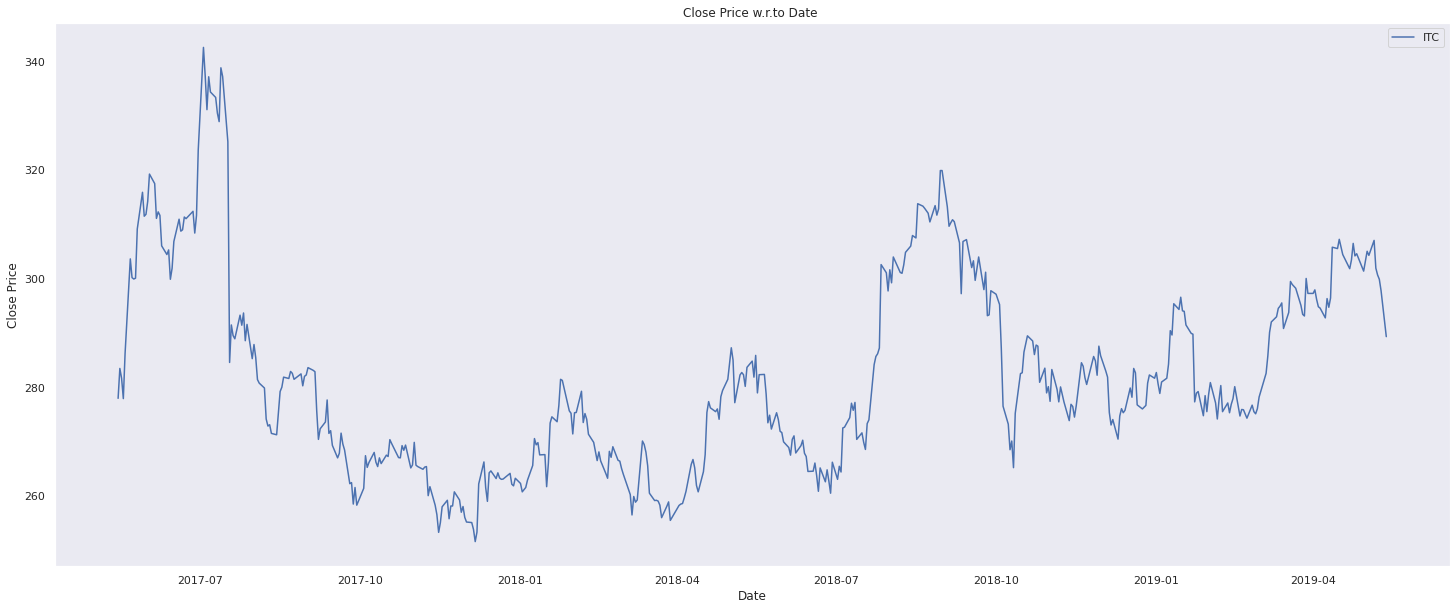

In [10]:
plt.figure(figsize=(25,10))
plt.plot(df['Date'], df['Close Price'], label = 'ITC')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price w.r.to Date ')
plt.legend()
plt.grid()
plt.show()

### 2.2 A stem plot is a discrete series plot, ideal for plotting daywise data.

It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


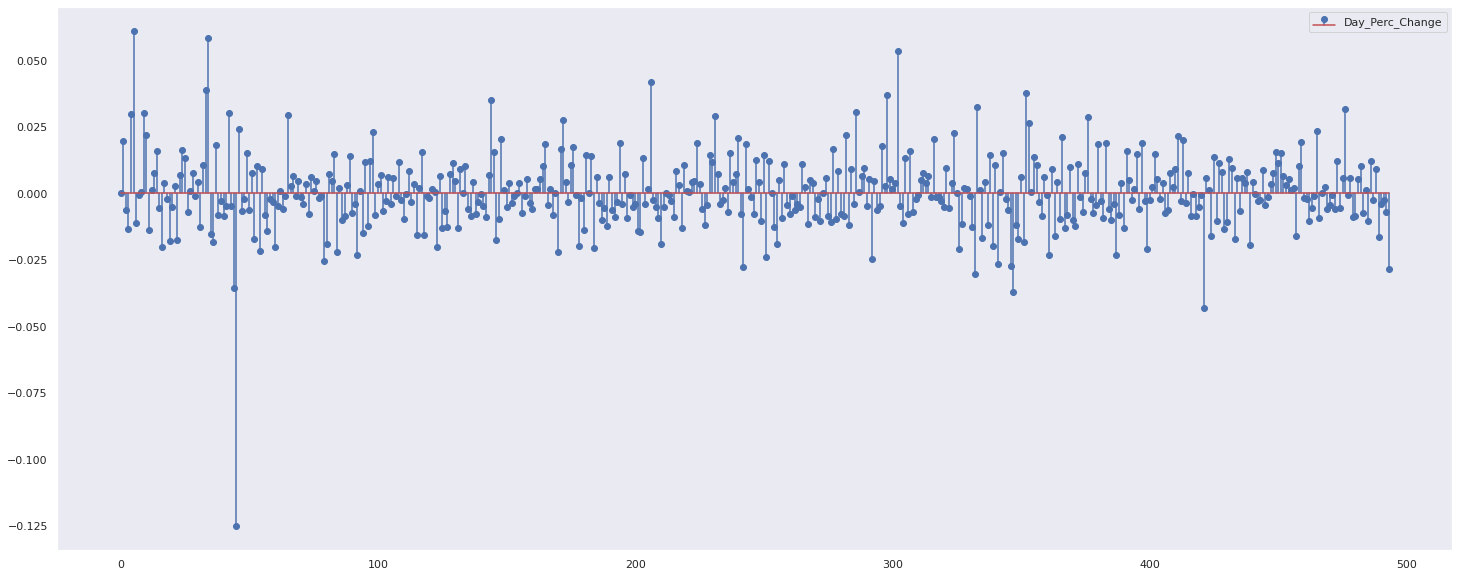

In [11]:
plt.figure(figsize=(25,10))
plt.stem(df['Day_Perc_Change'], label='Day_Perc_Change')

plt.legend()
plt.grid()
plt.show()

### 2.3 Plot the daily volumes as well and compare the percentage stem plot to it. 

Document your analysis of the relationship between volume and daily percentage change.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


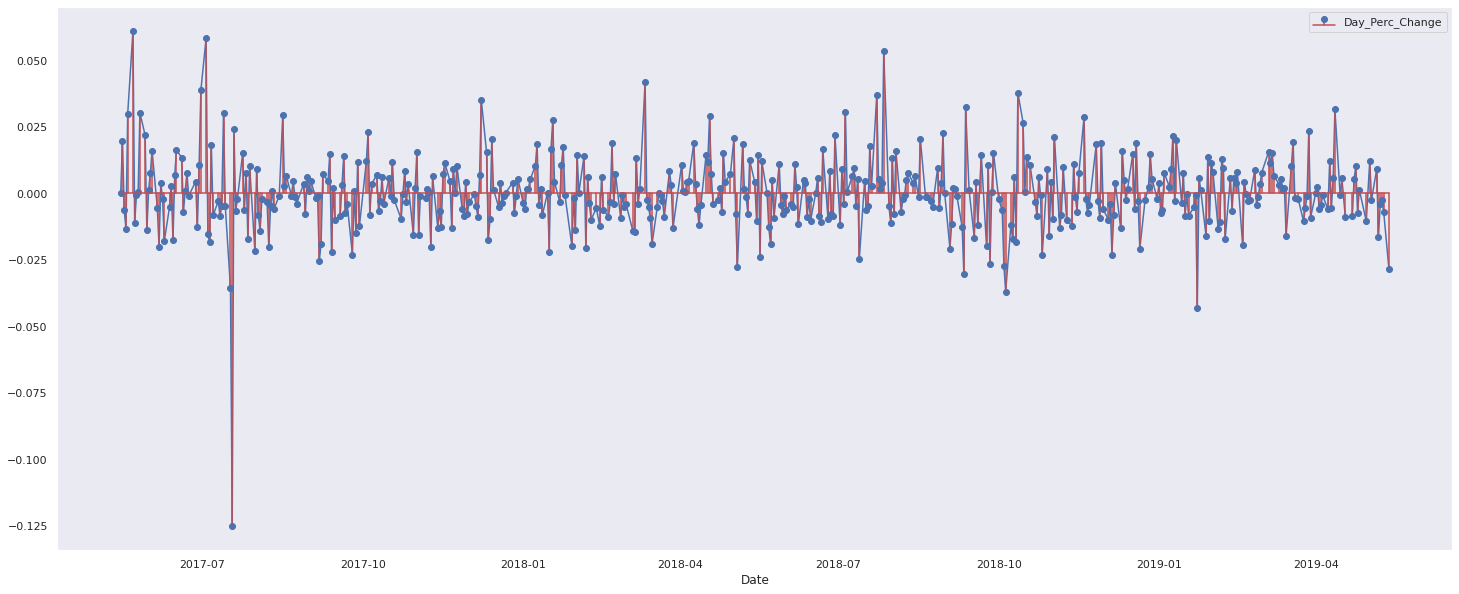

In [12]:
plt.figure(figsize=(25,10))
plt.plot(df['Date'], df['Day_Perc_Change'], color = 'b')
plt.stem(df['Date'], df['Day_Perc_Change'], 'r', label='Day_Perc_Change')
plt.xlabel('Date')
#plt.ylabel('Close Price')
#plt.title('Date vs Close Price')
plt.legend()
plt.grid()
plt.show()

### 2.4 We want to see how often each Trend type occurs. 

We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. 

In [13]:
df.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'Month', 'Year', 'VWAP', 'Day_Perc_Change',
       'Trend'],
      dtype='object')

In [14]:
trend_groupby = df.groupby('Trend').count()['Symbol']
trend_groupby

Trend
Slight or No change    494
Name: Symbol, dtype: int64

Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart.

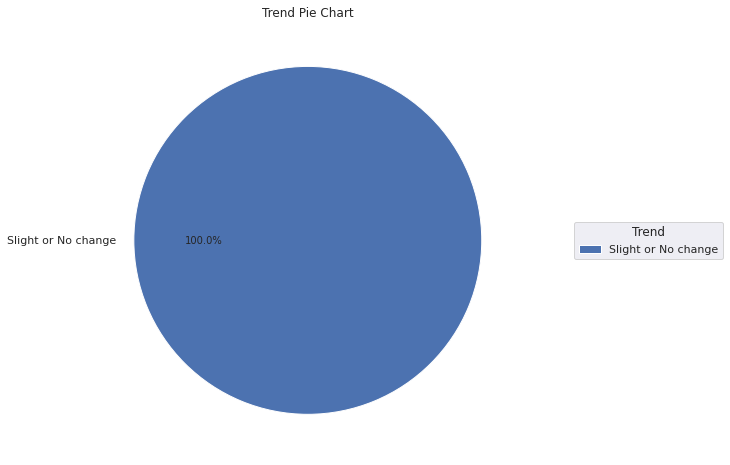

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(trend_groupby, labels=trend_groupby.index, autopct='%1.1f%%')

ax.set_title("Trend Pie Chart")
ax.legend(trend_groupby.index,
          title="Trend",
          loc="center left",
          bbox_to_anchor=(1.1, 0, 0.5, 1))

plt.show()

From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [16]:
groupby_trend = df.groupby('Trend', as_index = False)['Total Traded Quantity']

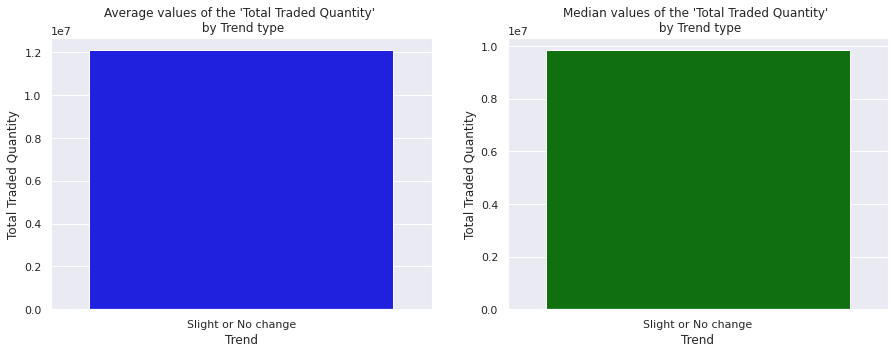

In [18]:
fig, axes = plt.subplots(figsize=(15, 5), nrows=1, ncols=2)

axes[0].set_title("Average values of the 'Total Traded Quantity' \n by Trend type")
sns.barplot(ax = axes[0], x = 'Trend', y = 'Total Traded Quantity', color = 'blue', 
            data = groupby_trend.mean().sort_values('Total Traded Quantity'))

axes[1].set_title("Median values of the 'Total Traded Quantity' \n by Trend type")
sns.barplot(ax = axes[1], x = 'Trend', y = 'Total Traded Quantity', color = 'green', 
            data = groupby_trend.median().sort_values('Total Traded Quantity'))

plt.show()

### 2.5 Plot the daily return (percentage) distribution as a histogram.

Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

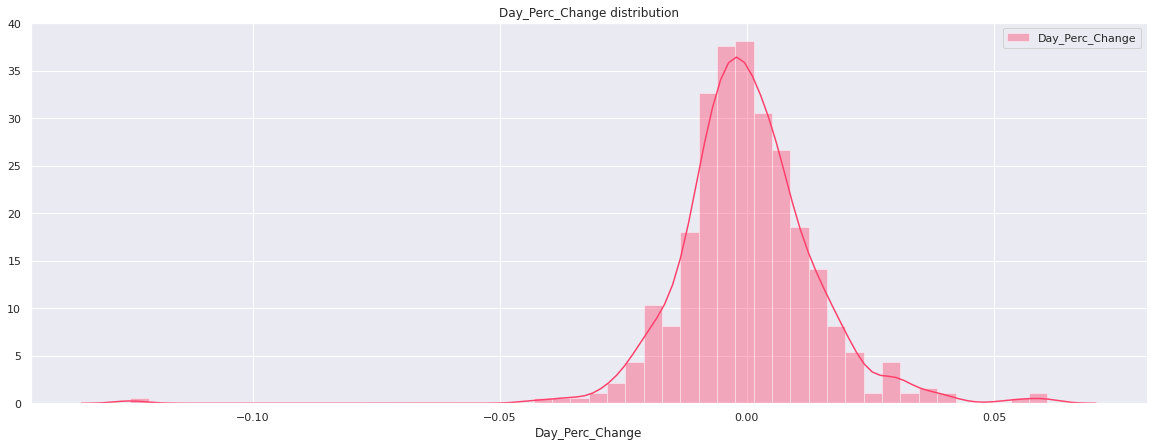

In [19]:
plt.figure(figsize=(20,7))

sns.distplot(df['Day_Perc_Change'], kde=True, rug=False, color = '#FF416C', label = 'Day_Perc_Change')
plt.legend()
plt.title("Day_Perc_Change distribution")
plt.show()

### 2.6 We next want to analyse how the behaviour of different stocks are correlated. 

The correlation is performed on the percentage change of the stock price instead of the stock price.

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock.

In [ ]:
ls

 Volume in drive G is SOFTWARES
 Volume Serial Number is 2A0A-CD3A

 Directory of G:\Learnings\Machine Learning Internship\aspiration.ai-ML-Internship\Module2

03-May-20  09:07 PM    <DIR>          .
03-May-20  09:07 PM    <DIR>          ..
28-Apr-20  11:37 PM    <DIR>          .ipynb_checkpoints
14-May-19  11:56 AM           117,033 ASIANPAINT.csv
14-May-19  11:56 AM           116,043 AXISBANK.csv
14-May-19  11:57 AM           115,781 DRREDDY.csv
14-May-19  11:59 AM           112,845 LT.csv
03-May-20  09:06 PM         1,399,084 Module2_Data_visualization_and_Technical_Analysis.ipynb
14-May-19  12:28 PM            31,537 Nifty50.csv
14-May-19  11:59 AM           116,043 RELIANCE.csv
26-Apr-20  05:45 PM            87,945 week2.csv
03-May-20  09:07 PM           154,803 week3.csv
               9 File(s)      2,251,114 bytes
               3 Dir(s)  10,892,537,856 bytes free


In [20]:
df1 = pd.read_csv('ASIANPAINT.csv')
df2 = pd.read_csv('AXISBANK.csv')
df3 = pd.read_csv('DRREDDY.csv')
df4 = pd.read_csv('LT.csv')
df5 = pd.read_csv('RELIANCE.csv')

In [21]:
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ASIANPAINT,EQ,15-May-2017,1132.95,1142.90,1149.9,1135.00,1149.90,1148.05,1145.57,729473,8.356654e+08,20868,471377,64.62
1,ASIANPAINT,EQ,16-May-2017,1148.05,1148.90,1149.7,1129.60,1143.50,1142.85,1137.20,913600,1.038946e+09,35436,641893,70.26
2,ASIANPAINT,EQ,17-May-2017,1142.85,1143.00,1159.0,1136.55,1156.75,1154.95,1149.76,579709,6.665239e+08,24824,282528,48.74
3,ASIANPAINT,EQ,18-May-2017,1154.95,1147.15,1159.8,1140.00,1154.80,1151.35,1149.89,702003,8.072265e+08,23468,436095,62.12
4,ASIANPAINT,EQ,19-May-2017,1151.35,1139.85,1144.8,1098.80,1131.00,1123.15,1124.84,1732673,1.948986e+09,87720,1021656,58.96


In [22]:
df2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AXISBANK,EQ,15-May-2017,503.0,505.00,508.50,498.40,500.25,500.1,502.95,8806756,4.429384e+09,109965,4320438,49.06
1,AXISBANK,EQ,16-May-2017,500.1,502.10,504.50,493.50,502.05,501.5,499.85,8610492,4.303938e+09,101028,4027982,46.78
2,AXISBANK,EQ,17-May-2017,501.5,501.35,506.75,498.50,502.00,502.8,502.88,6443135,3.240154e+09,84189,2876528,44.64
3,AXISBANK,EQ,18-May-2017,502.8,498.00,499.10,490.25,492.85,492.0,494.96,9227022,4.566993e+09,95624,5348691,57.97
4,AXISBANK,EQ,19-May-2017,492.0,495.75,503.85,494.20,501.90,501.7,499.10,7611430,3.798900e+09,72985,4190505,55.06


In [23]:
df3.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,DRREDDY,EQ,15-May-2017,2580.80,2600.00,2699.00,2592.00,2667.5,2675.80,2655.42,946756,2.514038e+09,60746,392469,41.45
1,DRREDDY,EQ,16-May-2017,2675.80,2690.80,2734.00,2690.80,2717.5,2724.10,2721.18,440462,1.198577e+09,27798,144587,32.83
2,DRREDDY,EQ,17-May-2017,2724.10,2720.00,2760.00,2686.55,2738.0,2736.90,2731.48,409818,1.119408e+09,25364,133595,32.60
3,DRREDDY,EQ,18-May-2017,2736.90,2695.00,2719.85,2672.20,2681.1,2678.95,2693.81,282411,7.607614e+08,22125,177774,62.95
4,DRREDDY,EQ,19-May-2017,2678.95,2694.95,2694.95,2637.00,2654.8,2656.45,2659.44,260677,6.932555e+08,35605,152233,58.40


In [24]:
df4.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LT,EQ,15-May-2017,1740.60,1748.60,1751.55,1736.50,1742.00,1742.40,1743.15,797134,1.389521e+09,52614,529359,66.41
1,LT,EQ,16-May-2017,1742.40,1747.00,1748.25,1727.55,1740.60,1740.70,1736.62,1102926,1.915365e+09,48756,674148,61.12
2,LT,EQ,17-May-2017,1740.70,1743.90,1764.00,1730.50,1754.30,1755.45,1749.36,1668586,2.918955e+09,77513,830692,49.78
3,LT,EQ,18-May-2017,1755.45,1739.65,1750.10,1716.40,1722.10,1722.60,1725.53,1437220,2.479968e+09,47602,915874,63.73
4,LT,EQ,19-May-2017,1722.60,1729.00,1734.00,1697.55,1720.05,1724.55,1718.73,1512094,2.598885e+09,59280,838396,55.45


In [25]:
df5.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32


In [26]:
for dfs in ([df1, df2, df3, df4, df5]):
    df['Series'] = df['Series'][df['Series'] == 'EQ']
    df.dropna(inplace = True)

In [27]:
df1.columns

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')

In [28]:
stocks_li = ['ASIANPAINT', 'AXISBANK', 'DRREDDY', 'LT', 'RELIANCE']

close_prices_df = pd.DataFrame(columns = stocks_li)

close_prices_df['Date'] = df1['Date']

for dfs in zip([df1, df2, df3, df4, df5], stocks_li):
    close_prices_df[dfs[1]] = dfs[0]['Close Price']

close_prices_df.set_index('Date', inplace = True)
close_prices_df.head()

,ASIANPAINT,AXISBANK,DRREDDY,LT,RELIANCE
Date,,,,,
15-May-2017,1148.05,500.1,2675.80,1742.40,1344.10
16-May-2017,1142.85,501.5,2724.10,1740.70,1356.30
17-May-2017,1154.95,502.8,2736.90,1755.45,1353.10
18-May-2017,1151.35,492.0,2678.95,1722.60,1327.35
19-May-2017,1123.15,501.7,2656.45,1724.55,1318.85


This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.


In [29]:
correlation = close_prices_df.pct_change().dropna()
correlation.head()

,ASIANPAINT,AXISBANK,DRREDDY,LT,RELIANCE
Date,,,,,
16-May-2017,-0.004529,0.002799,0.018051,-0.000976,0.009077
17-May-2017,0.010588,0.002592,0.004699,0.008474,-0.002359
18-May-2017,-0.003117,-0.021480,-0.021174,-0.018713,-0.019030
19-May-2017,-0.024493,0.019715,-0.008399,0.001132,-0.006404
22-May-2017,-0.009438,0.001196,-0.017975,0.015888,0.004019


Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification.

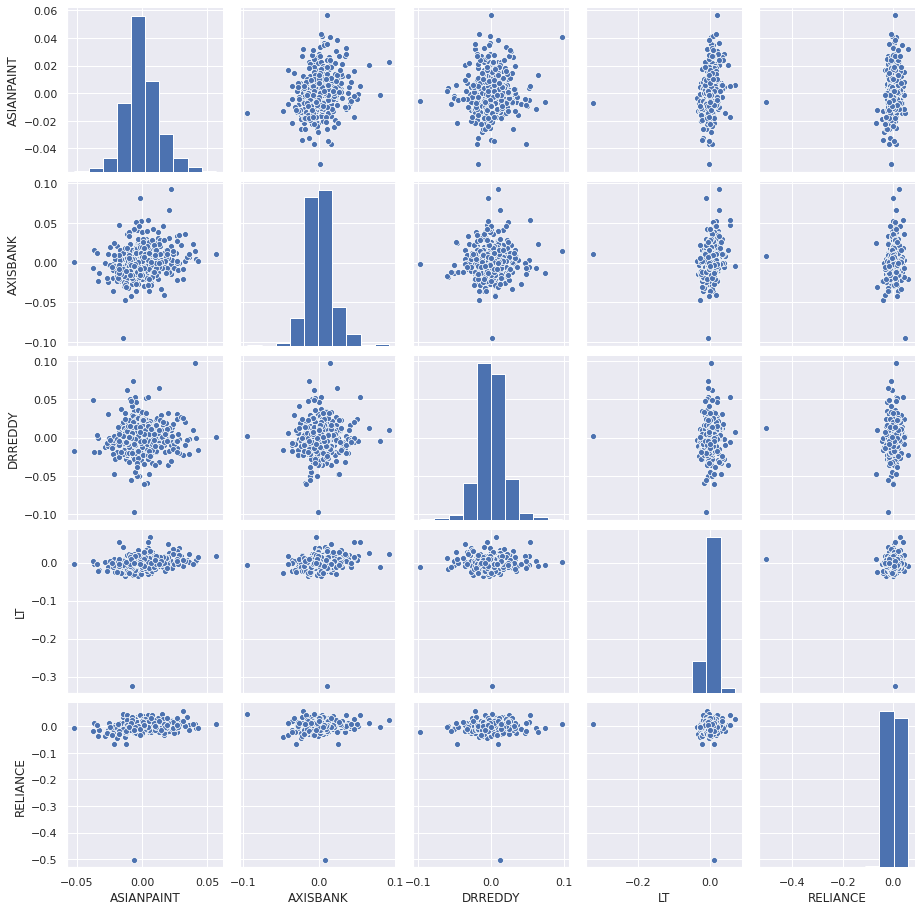

In [30]:
sns.pairplot(correlation)

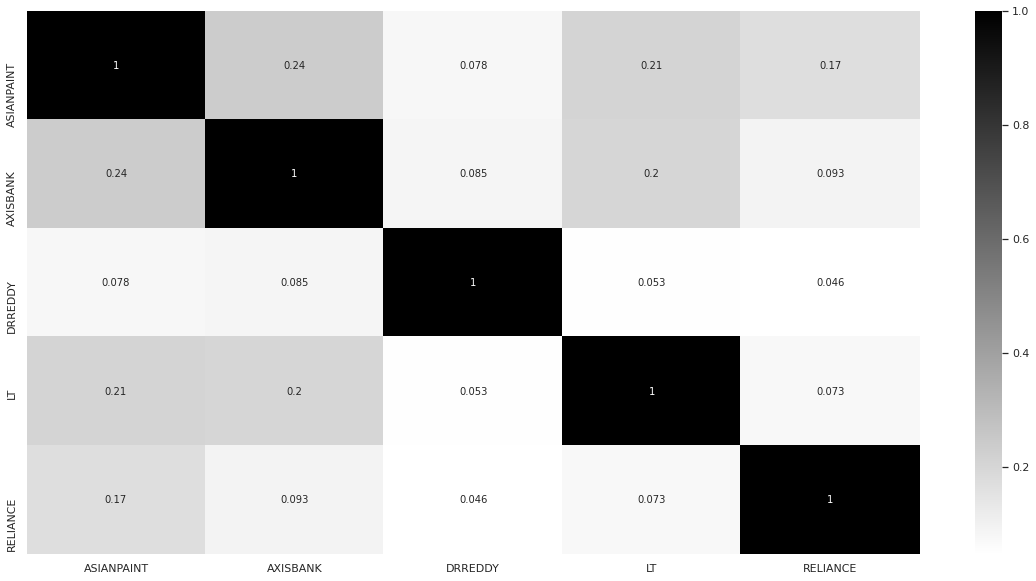

In [31]:
plt.figure(figsize=(20,10))


corr = correlation.corr()
sns.heatmap(corr, annot=True, cmap='gist_yarg')
plt.show()

### 2.7 Volatility is the change in variance in the returns of a stock over a specific period of time.

Do give the following documentation on volatility a read.

You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.

Note: pandas provides a rolling() function for dataframes and a std() function also which you can use.

In [32]:
df['Volatility'] = df['Close Price'].pct_change().rolling(7).std() * np.sqrt(7)

In [33]:
correlation_volatility = correlation.rolling(7).std() * np.sqrt(7)
correlation_volatility.head(15)

,ASIANPAINT,AXISBANK,DRREDDY,LT,RELIANCE
Date,,,,,
16-May-2017,NaN,NaN,NaN,NaN,NaN
17-May-2017,NaN,NaN,NaN,NaN,NaN
18-May-2017,NaN,NaN,NaN,NaN,NaN
19-May-2017,NaN,NaN,NaN,NaN,NaN
22-May-2017,NaN,NaN,NaN,NaN,NaN
23-May-2017,NaN,NaN,NaN,NaN,NaN
24-May-2017,0.027958,0.032116,0.040213,0.043321,0.025746
25-May-2017,0.039294,0.036164,0.033891,0.070217,0.022687
26-May-2017,0.042565,0.036688,0.027472,0.070457,0.039901


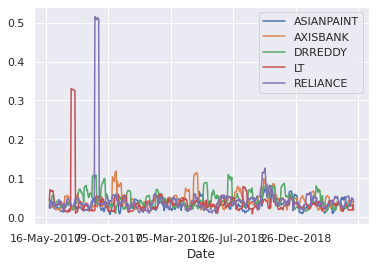

In [34]:
correlation_volatility.plot()
plt.show()

### 2.8 Calculate the volatility for the Nifty index and compare the 2

This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3)

In [36]:
nifty = pd.read_csv('Nifty50.csv')

nifty.set_index('Date', inplace=True, drop=False)

nifty['Volatility'] = nifty.Close.pct_change().rolling(7).std() * np.sqrt(7)

nifty.head(10)

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),Volatility
Date,,,,,,,,
15-May-2017,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97,NaN
16-May-2017,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89,NaN
17-May-2017,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23,NaN
18-May-2017,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46,NaN
19-May-2017,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77,NaN
22-May-2017,22-May-2017,9480.25,9498.65,9427.90,9438.25,202874757,9432.97,NaN
23-May-2017,23-May-2017,9445.05,9448.05,9370.00,9386.15,231345629,11553.27,NaN
24-May-2017,24-May-2017,9410.90,9431.90,9341.65,9360.55,218265181,11045.95,0.014574
25-May-2017,25-May-2017,9384.05,9523.30,9379.20,9509.75,298147347,16964.26,0.021533


In [37]:
sns.set(rc={'figure.figsize':(20,10)})

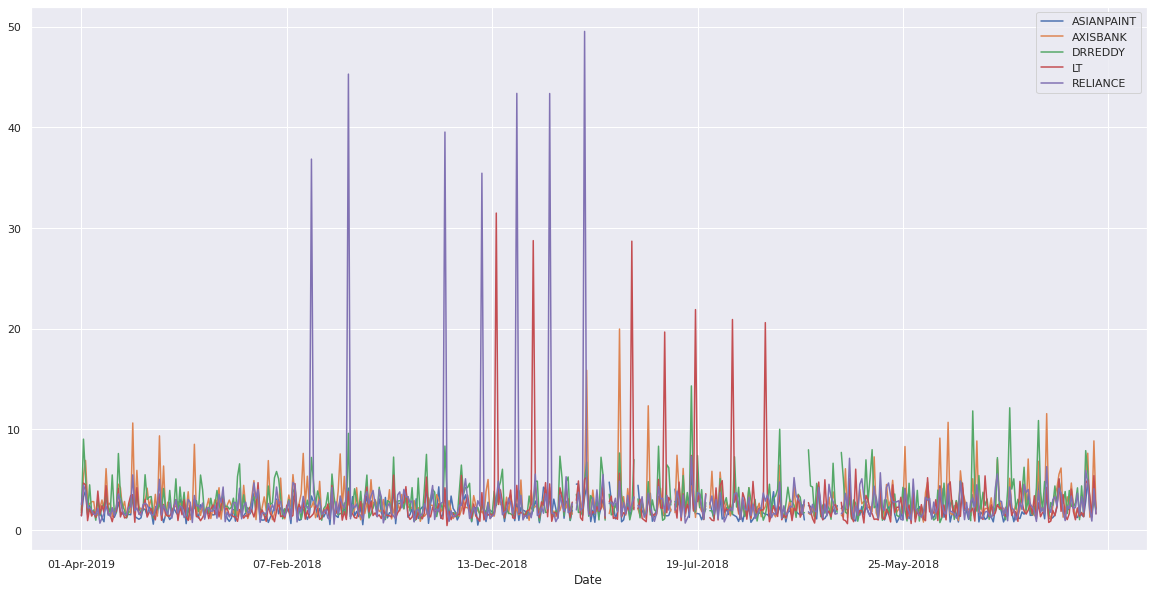

In [38]:
corr_beta = pd.DataFrame()

for name in correlation_volatility.columns:
    corr_beta[name] = correlation_volatility[name] / nifty['Volatility']
    
corr_beta.plot()
plt.show()

### 2.9 Trade Calls - Using Simple Moving Averages. Study about moving averages here.

Plot the 21 day and 34 day Moving average with the average price and decide a Call !

Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average.

One of the most widely used technical indicators.

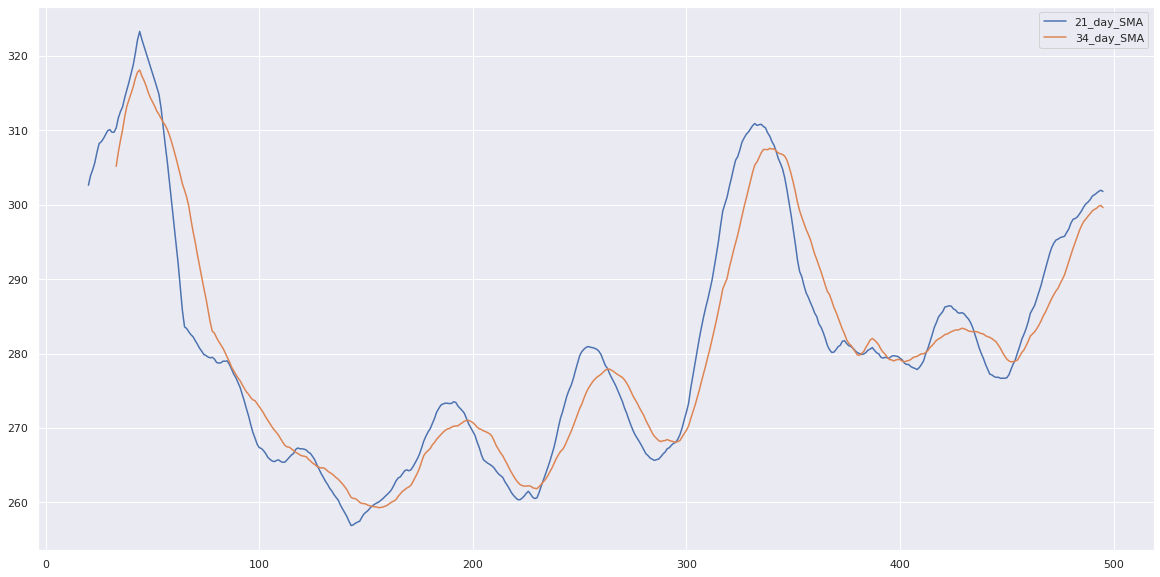

In [39]:
df["21_day_SMA"] = df['Close Price'].rolling(21).mean()
df["34_day_SMA"] = df['Close Price'].rolling(34).mean()
df[["21_day_SMA", "34_day_SMA"]].plot()
plt.show()

In [40]:
df.set_index('Date', inplace= True)
prev_index = df.index[0]
prev_row = df[:prev_index]
short_sma_higher = prev_row["21_day_SMA"][0] > prev_row["34_day_SMA"][0]
df['Trade_Call'] = 'HODL'

In [41]:
for index, row in df.iterrows():
    if row["21_day_SMA"] and row["34_day_SMA"]:    
        if short_sma_higher and row["21_day_SMA"] < row["34_day_SMA"]:
            result = "SELL"
        elif not short_sma_higher and row["21_day_SMA"] > row["34_day_SMA"]:
            result = "BUY"
        else:
            result = "HODL" 
        df.at[index, 'Trade_Call'] = result
        short_sma_higher = row["21_day_SMA"] > row["34_day_SMA"]                        
    
req = df[["Close Price", "21_day_SMA", "34_day_SMA", "Trade_Call"]][df['Trade_Call'] != "HODL" ]
req

,Close Price,21_day_SMA,34_day_SMA,Trade_Call
Date,,,,
2017-06-30,323.65,310.321429,305.170588,BUY
2017-08-01,287.85,310.438095,311.089706,SELL
2017-11-01,269.85,267.107143,266.750000,BUY
2017-11-16,255.10,264.447619,264.727941,SELL
2017-12-21,263.05,259.523810,259.463235,BUY
2018-02-27,266.40,270.561905,271.039706,SELL
2018-04-20,276.20,263.000000,262.757353,BUY
2018-06-05,267.50,277.309524,277.904412,SELL
2018-07-19,273.30,268.523810,268.182353,BUY


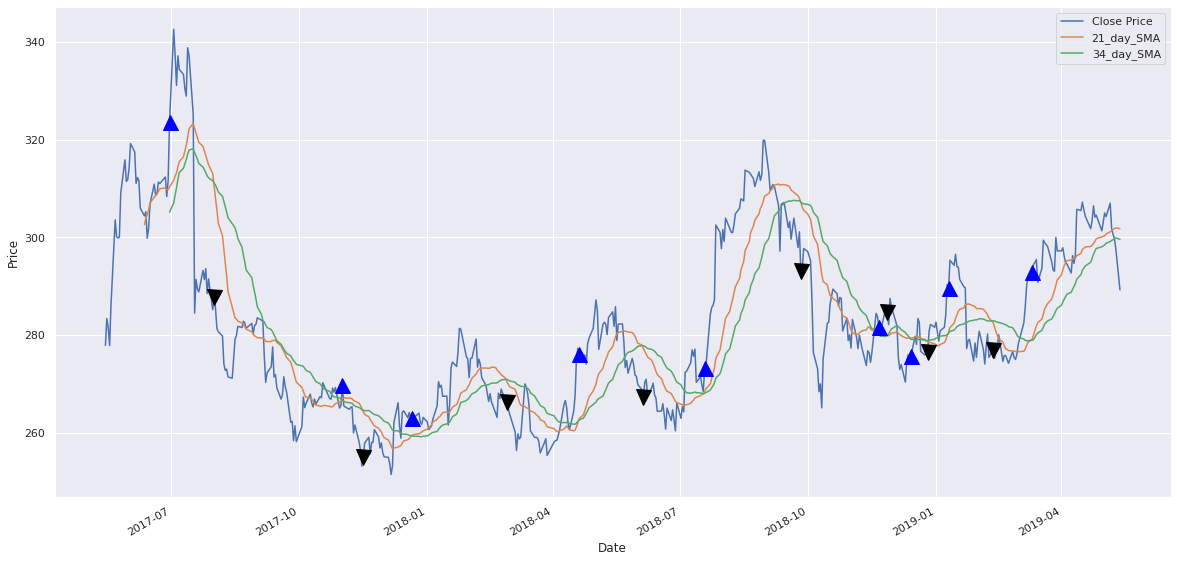

In [42]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel="Price")

df[["Close Price", "21_day_SMA", "34_day_SMA"]].plot(ax=ax1)

ax1.plot(df["Close Price"][df['Trade_Call'] == 'BUY' ].index, 
         df["Close Price"][df['Trade_Call'] == 'BUY' ], '^', markersize=15, color='blue' )

ax1.plot(df["Close Price"][df['Trade_Call'] == 'SELL' ].index, 
         df["Close Price"][df['Trade_Call'] == 'SELL' ], 'v', markersize=15, color='black' )

plt.show()

### 2.10 Trade Calls - Using Bollinger Bands
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average
The bollinger bands comprise the following data points-

- The 14 day rolling mean of the closing price (we call it the average) 
- Upper band which is the rolling mean + 2 standard deviations away from the average. 
- Lower band which is the rolling mean - 2 standard deviations away from the average. 
- Average Daily stock price.

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.

Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands.
Save to a new csv file.

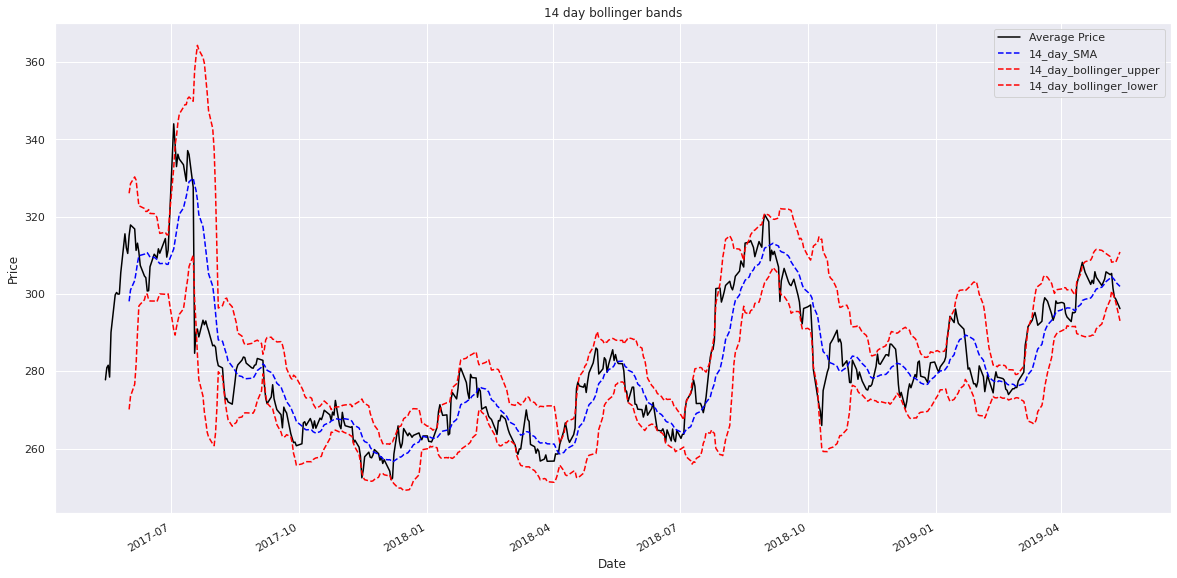

In [43]:
df["14_day_SMA"] = df['Close Price'].rolling(14).mean()
df["14_day_STD"] = df['Close Price'].rolling(14).std()
df["14_day_bollinger_upper"] = df["14_day_SMA"] + df["14_day_STD"] * 2
df["14_day_bollinger_lower"] = df["14_day_SMA"] - df["14_day_STD"] * 2
df.reset_index(inplace=True)

ax = plt.gca()

df.plot(kind='line',x='Date', y='Average Price', ax=ax, color='black')
df.plot(kind='line',x='Date', y='14_day_SMA', ax=ax, color='blue', linestyle='--')
df.plot(kind='line',x='Date', y='14_day_bollinger_upper', ax=ax, color='red', linestyle='--')
df.plot(kind='line',x='Date', y='14_day_bollinger_lower', ax=ax, color='red', linestyle='--')


plt.title("14 day bollinger bands")
plt.ylabel("Price")
plt.show()

In [44]:
df.to_csv('week3.csv')